In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/MATC_Projects.csv'
df1 = pd.read_csv(url)
df1.head()

,id,title,author_name,mathworks_url,summary,content,category,author_uri,published,updated,no_of_comments,no_of_ratings,average_rating,downloads,download_link,license,model_files,num_model_file
0,261,RF Design and Analysis,Jackson Harvey,https://www.mathworks.com/matlabcentral/fileex...,"A collection of functions, scripts, & Simulink...",<p>This is a collection of MATLAB functions an...,NaN,https://www.mathworks.com/matlabcentral/profil...,2001-07-23 12:51:25.000000,2001-07-23 12:51:25.000000,18,46,4,3,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, Jackson Harvey\nAll rights...","RF.mdl,",1
1,266,smxl,Giampiero Campa,https://www.mathworks.com/matlabcentral/fileex...,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,https://www.mathworks.com/matlabcentral/profil...,2007-10-23 08:01:38.000000,2007-10-23 08:01:38.000000,3,4,4,1,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 1999, Giampiero Campa\nAll right...","smxl.mdl,examples/vrsvdex.mdl,examples/vrranke...",15
2,268,trimmod,Joerg Buchholz,https://www.mathworks.com/matlabcentral/fileex...,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,https://www.mathworks.com/matlabcentral/profil...,2017-03-17 11:54:23.000000,2017-03-17 11:54:23.000000,1,2,5,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2009, Joerg Buchholz\nAll rights...",trimmod/trimtest/trimtest_with_vector_outport....,2
3,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:04.000000,2016-09-01 15:00:04.000000,21,22,4,12,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","bluetooth.mdl,R12.1 Original Version/bluetooth...",2
4,724,DTMF generator and receiver,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:05.000000,2016-09-01 15:00:05.000000,11,27,3,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","dtmf.mdl,R12.1 Original Version/dtmf.mdl,",2


In [3]:
df1['summary']

0       A collection of functions, scripts, & Simulink...
1       The Simulink MatriX Library (SMXL) - a collect...
2       TrimMod finds the trim point (equilibrium) of ...
3              Bluetooth modulation and frequency hopping
4                             DTMF generator and receiver
                              ...                        
2719    A very basic example of physical modeling in S...
2720    I2C sensors can be read directly in Simulink u...
2721    This is the Ball on Plate Simscape Model, Cont...
2722                                  Single Phase dimmer
2723    ِABB Automatic Generation Control (frequency r...
Name: summary, Length: 2724, dtype: object

In [4]:
df1['category'].isnull().sum()

88

In [5]:
df1.shape

(2724, 18)

In [6]:
df1 = df1.dropna()
df1.shape

(2636, 18)

In [7]:
df1['category'].isnull().sum()

0

In [8]:
# removing everything except alphabets`
df1['cat'] = df1['category'].str.replace("[^a-zA-Z#]", " ")


In [9]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma is  a phy pn pn string power control reve...
6       is  a call processing mobile phone is  a call ...
7            b bluetooth cvsd frequency hopping matlab...
                              ...                        
2717    electrical vehicle ev fast battery charging fu...
2718                                  buck dc synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection i c mma     m...
2721      ball on plate diagnostic pid sfunction simscape
Name: cat, Length: 2636, dtype: object

In [10]:
# removing null fields
df1 = df1[df1['cat'].notnull()]
# removing short words
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# make all text lowercase
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [11]:
df1['cat'] = df1['cat'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df1['cat'] = df1['cat'].apply(lambda x: x.lower())

In [12]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma string power control reverse traffic simu...
6       call processing mobile phone call processing m...
7       bluetooth cvsd frequency hopping matlab simuli...
                              ...                        
2717    electrical vehicle fast battery charging fuzzy...
2718                                     buck synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection real time sim...
2721             ball plate diagnostic sfunction simscape
Name: cat, Length: 2636, dtype: object

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
tokenized_doc = df1['cat'].apply(lambda x: x.split())
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [15]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [16]:
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)

['bluetooth frequency hopping network wireless bluetooth frequency hopping network wireless bluetooth hopping wireless bluetooth frequency frequency bluetooth', 'communications dtmf dual tone multi frequency simulink dtmf dual tone', 'cdma string power control reverse traffic simulink stateflow wireless cdma cdma power control power control string', 'call processing mobile phone call processing mobile phone seminar wireless call processing mobile phone call processing mobile phone', 'bluetooth cvsd frequency hopping matlab simulink voice wireless bluetooth cvsd frequency hopping matlab simulink voice bluetooth bluetooth', 'fuzzy neural networks suren adaptive neural networks adaline adaptive neural networks ebpa fuzzy logic mran neural networks neural networks adaline neural networks', 'filters filters signal signal processing time frequency wavelets wavelets simulink', 'marine simulation submarine underwater vehicle', 'flow fluid hydraulic line pipeline pressure simulation flow fluid 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df = 0.5, use_idf = True, ngram_range=(1,3))
X = vectorizer.fit_transform(detokenized_doc)
print(X.shape) # check shape of the document-term matrix


(2565, 23134)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df = 0.5, use_idf = True, ngram_range=(1,3))
X_dense = vectorizer.fit_transform(detokenized_doc).todense()

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_dense)
data2D = pca.transform(X_dense) 

#Silhouette Method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
num_clusters = 40

for i in range(2,num_clusters+1):
  km = KMeans(n_clusters=i)
  cluster_labels = km.fit_predict(data2D)
  silhouette_avg = silhouette_score(data2D, cluster_labels)
  print(silhouette_avg)

0.6186442175437998
0.6886776164575245
0.6564554222779103
0.5526165728731779
0.5564841360570166
0.5485890086621725
0.5445437020179742
0.5392958199016865
0.5201161928976973
0.5277105874762484
0.5316624868729442
0.5364296630537317
0.5230288449681023
0.5480221965711108
0.559203566527153
0.5635533299184519
0.5602612444871478
0.5553757955685968
0.5645406146268785
0.560549509035953
0.5532114453381058
0.5591727005137446
0.5554727769615598
0.559965496346997
0.5589287496553518
0.56791906191512
0.5626818457844175
0.5736330582707169
0.5661913426985504
0.5509347668198777
0.5780093129091868
0.5675830460698137
0.5527950400380556
0.566023666160064
0.5676952936077199
0.5692459536035127
0.5561697022452461
0.5538849826770035
0.5486340788006876


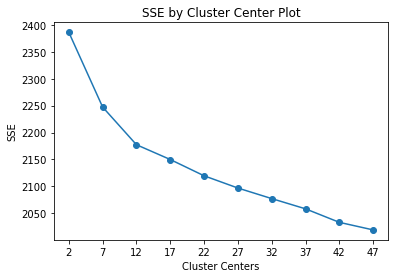

In [19]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 5)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 50)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
num_clusters = 12
km = KMeans(n_clusters=num_clusters)
km.fit(X)
#clusters = km.labels_.tolist()
clusters = km.predict(X)
labels = np.unique(clusters)
print(np.unique(clusters))
print(km.cluster_centers_)

print(clusters.shape)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
print(dist)

In [ ]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
print("centroids:",order_centroids)
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, n_components=6, n_iter=100,
                              random_state=122)


In [ ]:
print(km.cluster_centers_)

In [ ]:
pip install umap-learn


In [ ]:
import umap
import seaborn as sns
X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = clusters,
s = 10, # size
edgecolor='none'
)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [ ]:

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]